# Assignment_15.1
## In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
#Importinglibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import dataset
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
# first five rows of the dataset
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.shape

(481, 31)

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

#### pts - "total points the player scored" is the target variable.
in the below line we create y as target variable to be fed into algorithm

In [5]:
y=nba.pop('pts')

In [6]:
nba.shape

(481, 30)

In [7]:
# since this is a regression problem, we are concerned with numerical variables. below 4 columns are not gonna help building 
#model so dropping those from the features.
not_features=nba.drop(columns=['player','pos','bref_team_id','season'],axis=1,inplace=True)

In [8]:
nba.shape

(481, 26)

In [9]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,2013


### Missing values in the dataset

In [30]:
nba.isnull().sum()
#There are 3 features where we see null values present. {fg.,x3p.,ft.,x2p.,efg.}

age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            2
x3p            0
x3pa           0
x3p.          67
x2p            0
x2pa           0
x2p.           3
efg.           2
ft             0
fta            0
ft.           20
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
season_end     0
dtype: int64

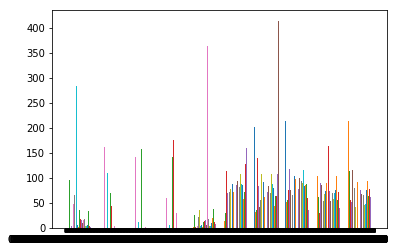

In [18]:
#Histograms 
import matplotlib.pyplot as plt
import pylab
import numpy as np

pylab.figure()
pylab.hist(nba[~np.isnan(nba['x3p.'])])
#pylab.hist(nba.x)
pylab.show()

In [36]:
#Missing value imputation(filling null with median)
cols=['x3p.','fg.','ft.','x2p.','efg.']
for col in cols:
    nba[col].fillna(value=nba[col].median(), inplace=True)

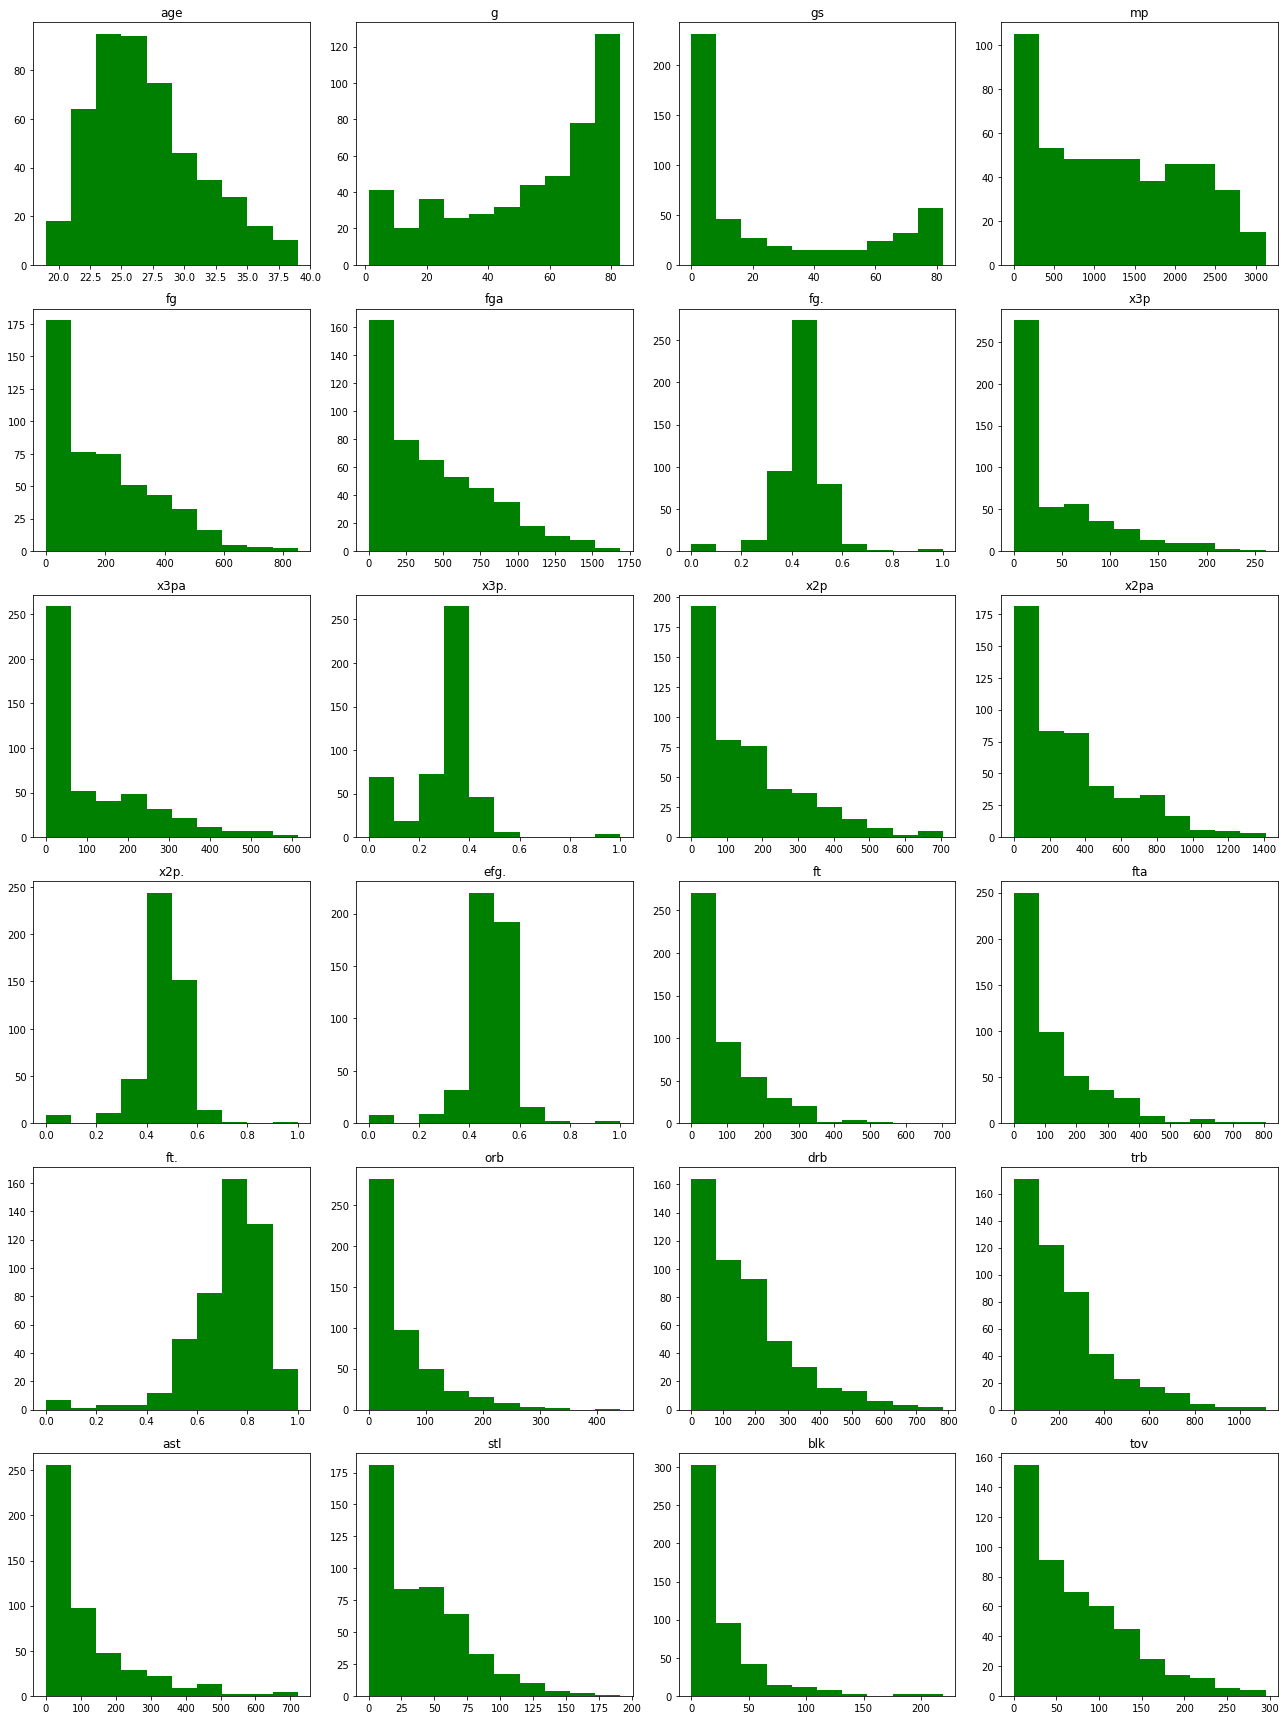

In [38]:
# histogram of all the features 
colu=list(nba.columns.values)
fig,axes=plt.subplots(6,4, figsize=(18,24))

for i, ax in enumerate(axes.flat):
    if i<len(colu):
        ax.hist(nba[colu[i]],color='green')
        ax.set_title(colu[i])
        
        
plt.tight_layout()

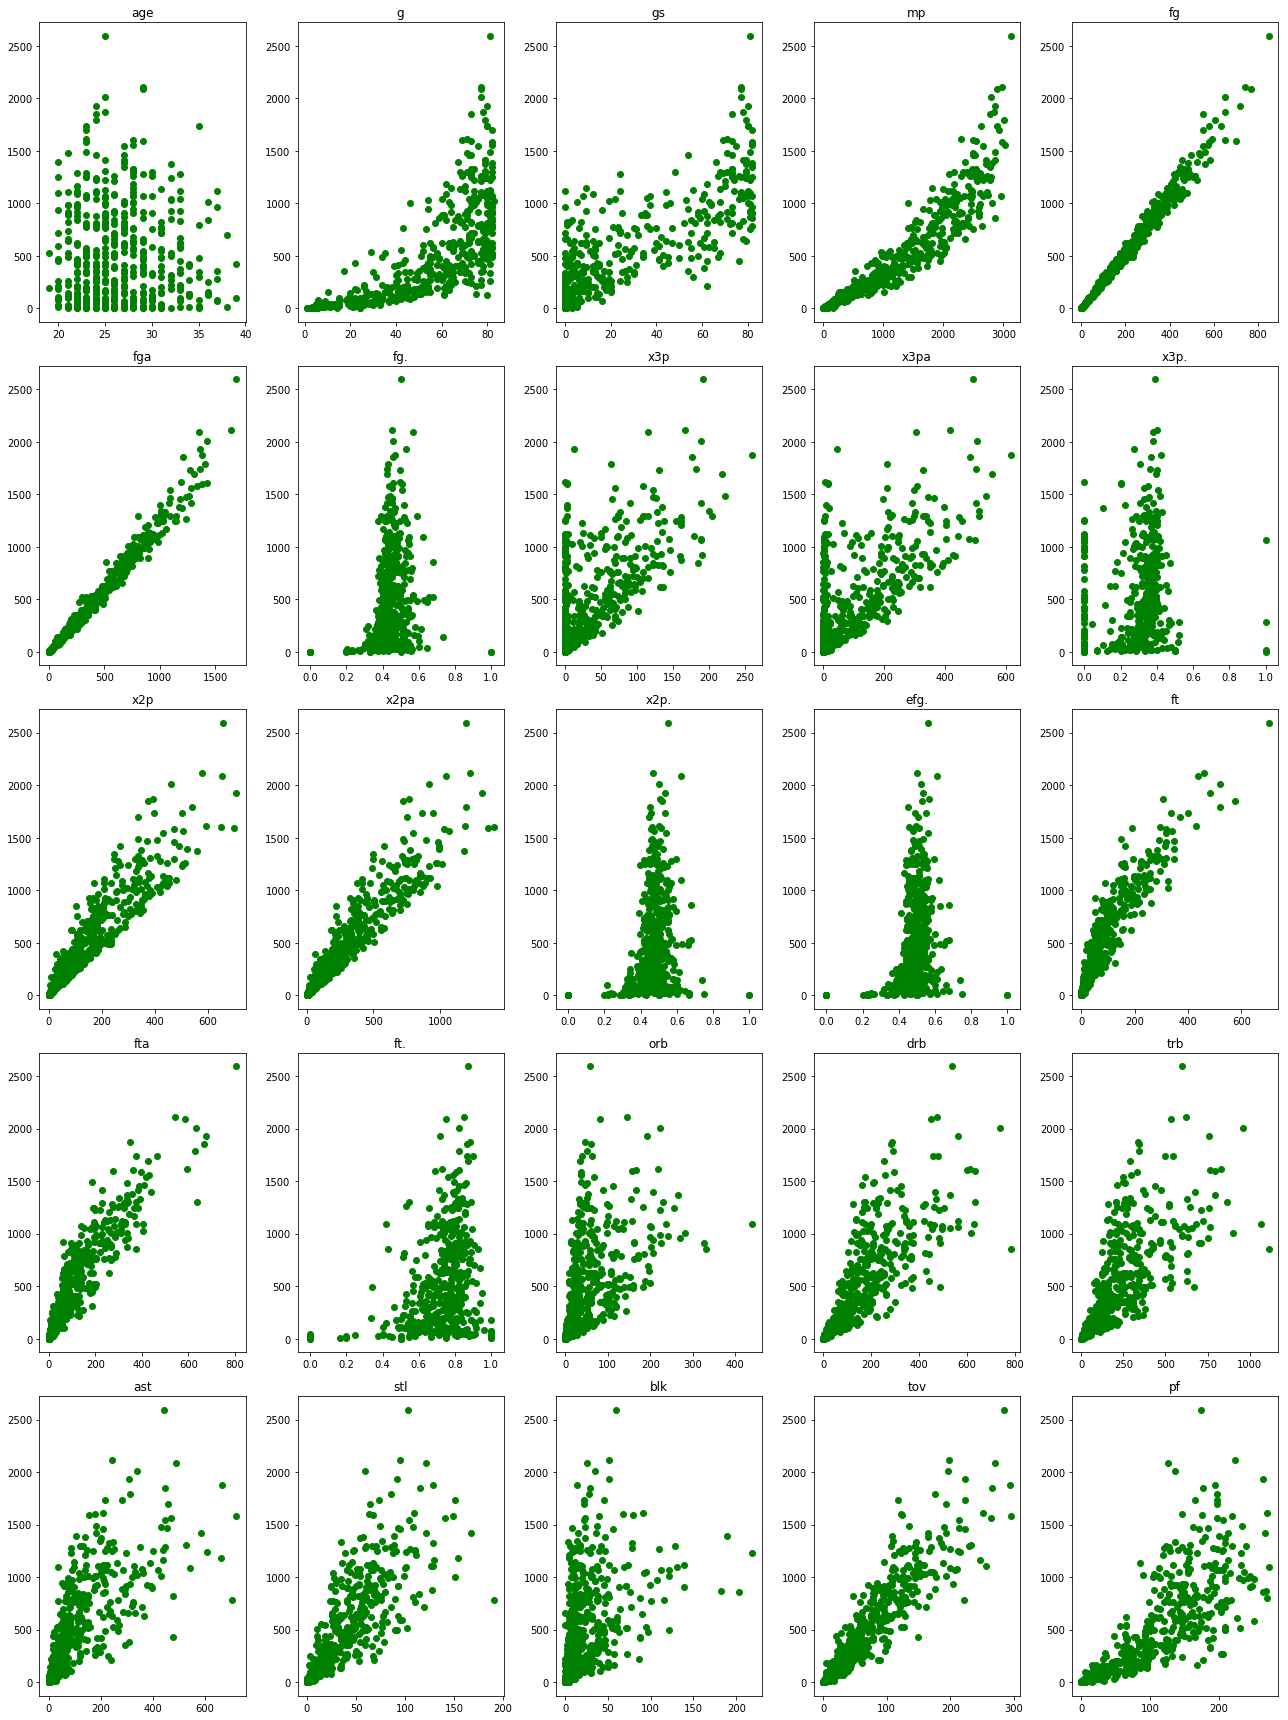

In [28]:
fig,axes=plt.subplots(5,5, figsize=(18,24))
for i, ax in enumerate(axes.flat):
    if i<26:
        ax.scatter(nba[colu[i]],y,color='green')
        ax.set_title(colu[i])
plt.tight_layout()

### Creating train and test set
For this problem i'm not using sklearn train test split to create train and test set but we'll create them manually.

In [39]:
# shuffle the dataset
import random
from numpy.random import permutation

# Randomly shuffle the index of nba.
random_indices = permutation(nba.index)


In [40]:
random_indices

array([142, 143, 166, 295, 176, 433, 132, 271, 280, 251, 454,  64, 393,
       154, 178,  81, 465, 478, 414, 308, 146, 350, 396, 247,  38, 114,
        62,  44, 316,  59, 184, 425, 175, 464, 461, 452, 402, 268, 332,
       380, 455, 225, 370,  17, 355, 432, 248, 282, 474, 306, 249, 128,
        67, 462, 199, 159, 357, 165, 297, 362,  61, 212, 107, 329, 379,
       287, 123, 375, 449, 314, 281, 273, 205, 291, 446, 150, 156,  73,
        57, 187, 190, 158, 130,  96, 234,  55, 232, 294, 477, 244,  85,
        60, 367, 217, 325, 443,  70, 300,   4, 141, 345, 171, 377, 331,
        33,  54, 397,  47, 155, 219,  52, 133, 250, 324, 144, 189,   3,
       424, 318, 257, 459, 145, 391, 480,  49, 328, 276, 108, 140, 239,
       293, 127, 109, 185, 353, 121, 259, 102, 157, 264, 335, 224, 269,
       361, 299, 444, 241, 453, 437, 138, 336, 416, 275, 463, 204,  19,
         1, 172,  37, 153, 111, 258, 286, 399, 221, 261, 272, 415, 327,
       458, 255, 348, 407, 351, 254, 152,  82, 403, 173, 309, 42

In [41]:
# Set a cutoff for how many items we want in the test set (in this case 1/5 of the items)
import math
test_cutoff = math.floor(len(nba)/5)
test_cutoff

96

In [42]:
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = nba.loc[random_indices[1:test_cutoff]]
test.shape

(95, 26)

In [43]:
# Generate the train set with the rest of the data.
train = nba.loc[random_indices[test_cutoff:]]

In [44]:
train.shape

(385, 26)

In [45]:
# train and test set for target varible
y_test=y.loc[random_indices[1:test_cutoff]]
y_train=y.loc[random_indices[test_cutoff:]]

### Using sklearn Knn modeler for regression

In [58]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=10)
# Fit the model on the training data.
knn.fit(train, y_train)
# Make point predictions on the test set using the fit model.
knn_pred = knn.predict(test)


In [59]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error
error= mse(y_test,knn_pred)

In [60]:
print("mean squared error of the model is ",error)

mean squared error of the model is  9210.853368421052


### K fold cross validation

In [61]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(KNeighborsRegressor(n_neighbors=5),nba,y,scoring='neg_mean_squared_error', cv=10)

In [62]:
cv_score.mean()

-5357.429913265306

In [63]:
np.sqrt(cv_score.mean()*-1)

73.19446641150755

In [ ]:
### Model is not doing good as rmse is very high

### Linear regression modelling 

In [64]:
from sklearn.linear_model import LinearRegression
# Create the knn model.
# Look at the five closest neighbors.
Linreg = LinearRegression()
# Fit the model on the training data.
Linreg.fit(train, y_train)
# Make point predictions on the test set using the fit model.
LR_pred = Linreg.predict(test)

In [65]:
MSE=mean_squared_error(y_test,LR_pred)

In [66]:
MSE

6.20470677367108e-25

In [67]:
cv_score= cross_val_score(LinearRegression(),nba,y,scoring='neg_mean_squared_error', cv=10)

In [68]:
cv_score

array([-2.32244926e-24, -6.14573232e-25, -1.88418379e-24, -4.89711601e-25,
       -9.76530598e-25, -5.15368236e-25, -3.60198639e-24, -3.53534442e-24,
       -3.36823001e-25, -3.41366219e-24])

In [69]:
cv_score.mean() #RMSE for LinReg using k fold cross validation

-1.7690632715585483e-24

### Using knn regressor we see rmse value is very high so we'll scale our features using standar scaler and then run the model again.

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [71]:
scaler= StandardScaler() # instantiate standard scaler

In [72]:
df_nba= scaler.fit_transform(nba) #Fitting the dataframe to standard scaler

In [75]:
#train and test set 
X_train,X_test,y_train,y_test= train_test_split(df_nba,y,test_size=0.33,random_state=120)

In [76]:
print("shape of training features",X_train.shape)
print("shape of test features",X_test.shape)
print("shape of train target",y_train.shape)
print("shape of test target",y_test.shape)


shape of training features (322, 26)
shape of test features (159, 26)
shape of train target (322,)
shape of test target (159,)


In [86]:
#from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=3) # only 3 neighbours
# Fit the model on the training data.
knn.fit(X_train, y_train)
# Make point predictions on the test set using the fit model.
knn_pred = knn.predict(X_test)

In [87]:
print("RMSE of the scaled dataset using knn regressor is ",np.sqrt(mean_squared_error(y_test,knn_pred)))

RMSE of the scaled dataset using knn regressor is  98.05549705725147


In [88]:
### will run Linear regression model again.
#from sklearn.linear_model import LinearRegression
# Create the knn model.
# Look at the five closest neighbors.
#Linreg = LinearRegression()
# Fit the model on the training data.
Linreg.fit(X_train, y_train)
# Make point predictions on the test set using the fit model.
LR_pred_scaled = Linreg.predict(X_test)

In [89]:
print("RMSE of the scaled dataset using knn regressor is ",np.sqrt(mean_squared_error(y_test,LR_pred_scaled)))

RMSE of the scaled dataset using knn regressor is  1.021133762790078e-12
